#Maestria en "Analítica de Datos"
---

Nombre: Oswaldo Salgado Gómez

Código: 79133277

Fecha: 2025 agosto 21

Descripción: Este libro trabaja ejercicios básicos de BigData

#1.Ejercicio 1: Cargar y visualizar datos en Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')
url="/content/drive/MyDrive/3. Semestre 3/Big Data/DataSets_TMP/Historial_de_Multas_reportados_en_el_SIMIT_-_FCM_20250821.csv"
df=pd.read_csv(url)

Mounted at /content/drive


In [ ]:
# # ID del archivo (extraído del enlace)
# file_id = '1_a48dsXFR_ES31ICL3A5Va6Fa7ezW_8M' # corresponde a los datos finales de la ruta copiada desde la raíz https://drive.google.com/file/d/1_a48dsXFR_ES31ICL3A5Va6Fa7ezW_8M/view?usp=sharing. Se debe ir al drive de google y buscar la carpeta donde está el archivo, se da clik derecho y se va a compartir, se copia el enlace, debe quedar opción de solo lectura para quien tenga el enlace

# url_multas=f'https://drive.google.com/uc?id={file_id}' #esta experesión siempre es la misma
# df=pd.read_csv(url_multas)
# #f=pd.read_csv(url, sep=',', on_bad_lines='skip', low_memory=False)

ParserError: Error tokenizing data. C error: Expected 2750 fields in line 22, saw 3815


##1.1 Conocer la Data

In [3]:
pd.set_option('display.max_columns', None) #Muestra todas las columnas
print(df.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA    DEPARTAMENTO        CIUDAD PAGADO_SI_NO
     2019 MIK715  25/01/2019     414,058       Santander   Bucaramanga           SI
     2020 IBF96B  11/02/2020           0            Meta Villavicencio           SI
     2020 AUW697  08/12/2020     877,803           Cauca    Mercaderes           NO
     2019 FCW577  11/03/2019     414,060       Antioquia      Medellin           SI
     2019 EVL11D  24/08/2019           0       Antioquia     Chigorodo           NO
     2021 FOR75D  09/08/2021     149,185 Valle del Cauca          Cali           SI
     2019 XKX76A  04/10/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 ELA11D  27/03/2019     414,060       Antioquia      Medellin           SI
     2019 TAY686  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           SI
     2019 BPI174  13/03/2019     414,100     Bogota D.C.   Bogota D.C.           NO
     2019 FLM417  13/03/2019     414,100     Bogota D.C.   Bogota D.C.      

In [4]:
#Mostrar la metadata (como están clasificados los datos)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25234188 entries, 0 to 25234187
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   object
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(1), object(6)
memory usage: 1.3+ GB
None


#2.Filtrado y selección para la ciudad de Medellín

In [5]:
#Seleccionar Medellín
df_medellin=df[df["CIUDAD"]=="Medellin"]
print(df_medellin.head(20).to_string(index=False))
print()
print(f"La cantidad de registros para Medellin es: {df_medellin.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO   CIUDAD PAGADO_SI_NO
     2019 FCW577  11/03/2019     414,060    Antioquia Medellin           SI
     2019 ELA11D  27/03/2019     414,060    Antioquia Medellin           SI
     2019 JVC48E  01/04/2019     414,060    Antioquia Medellin           NO
     2020 ZSF39E  21/06/2020     438,900    Antioquia Medellin           NO
     2019 SVB75D  09/07/2019     414,060    Antioquia Medellin           SI
     2019 LXE87C  16/03/2019     414,060    Antioquia Medellin           SI
     2019 MHL31C  13/03/2019     414,060    Antioquia Medellin           SI
     2019 IEV427  27/11/2019     414,060    Antioquia Medellin           NO
     2021 SJL25F  03/11/2021     447,678    Antioquia Medellin           SI
     2019 KHI865  12/03/2019     414,060    Antioquia Medellin           SI
     2020 JCO201  03/01/2020     438,900    Antioquia Medellin           SI
     2020 YWW97A  26/08/2020     877,800    Antioquia Medellin           SI
     2021 JZ

##2.1Conocer la Data

In [6]:
#Obtener los datos únicos de las vigencias
print(df_medellin["VIGENCIA"].unique())


[2019 2020 2021 2022 2023]


In [7]:
#Verificar si se tienen datos nulos
print(df_medellin.isnull().sum())


VIGENCIA        0
PLACA           0
FECHA_MULTA     0
VALOR_MULTA     0
DEPARTAMENTO    0
CIUDAD          0
PAGADO_SI_NO    0
dtype: int64


#3.ETL
---
Limpieza y transformación de los datos:

1. Borrado de registros con datos nulos
2. Crear nuevas columnas
3. Transformar columnas en datos reconocidos (número/texto/fecha/lista)

In [8]:
#Borrar la coma del valor de la multa

df_medellin["VALOR_MULTA"]=df_medellin["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
df_medellin["VALOR_MULTA"]=pd.to_numeric(df_medellin["VALOR_MULTA"], errors='coerce')
print()
print(df_medellin.info())

/tmp/ipython-input-2143518340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medellin["VALOR_MULTA"]=df_medellin["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)



<class 'pandas.core.frame.DataFrame'>
Index: 2735425 entries, 3 to 19958200
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   VIGENCIA      int64 
 1   PLACA         object
 2   FECHA_MULTA   object
 3   VALOR_MULTA   int64 
 4   DEPARTAMENTO  object
 5   CIUDAD        object
 6   PAGADO_SI_NO  object
dtypes: int64(2), object(5)
memory usage: 167.0+ MB
None


/tmp/ipython-input-2143518340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medellin["VALOR_MULTA"]=pd.to_numeric(df_medellin["VALOR_MULTA"], errors='coerce')


In [9]:
# Convirtiendo el pago de la multa en 0/1

df_medellin["PAGADO_SI_NO_NUM"]=df_medellin["PAGADO_SI_NO"].apply(lambda x:1 if x=="SI" else 0)
print(df_medellin.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2735425 entries, 3 to 19958200
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   VIGENCIA          int64 
 1   PLACA             object
 2   FECHA_MULTA       object
 3   VALOR_MULTA       int64 
 4   DEPARTAMENTO      object
 5   CIUDAD            object
 6   PAGADO_SI_NO      object
 7   PAGADO_SI_NO_NUM  int64 
dtypes: int64(3), object(5)
memory usage: 187.8+ MB
None


/tmp/ipython-input-3782381739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medellin["PAGADO_SI_NO_NUM"]=df_medellin["PAGADO_SI_NO"].apply(lambda x:1 if x=="SI" else 0)


In [10]:
print(df_medellin.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO   CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2019 FCW577  11/03/2019       414060    Antioquia Medellin           SI                 1
     2019 ELA11D  27/03/2019       414060    Antioquia Medellin           SI                 1
     2019 JVC48E  01/04/2019       414060    Antioquia Medellin           NO                 0
     2020 ZSF39E  21/06/2020       438900    Antioquia Medellin           NO                 0
     2019 SVB75D  09/07/2019       414060    Antioquia Medellin           SI                 1
     2019 LXE87C  16/03/2019       414060    Antioquia Medellin           SI                 1
     2019 MHL31C  13/03/2019       414060    Antioquia Medellin           SI                 1
     2019 IEV427  27/11/2019       414060    Antioquia Medellin           NO                 0
     2021 SJL25F  03/11/2021       447678    Antioquia Medellin           SI                 1
     2019 KHI865  12/03/2019       414060    Antio

#4.Agregación (filtros/acumulados) y estadistics descriptivas
---


* Filtros/acumulados
* Funciones básicas de Pandas



Funciones basicas de Pandas

In [11]:
#Estadisticas descriptivas con VALOR_MULTA
with pd.option_context("display.float_format", "{:f}".format):
    print(df_medellin["VALOR_MULTA"].describe())
print()
#Calcular el promedio de las multas por vigencia (año)
multas_promedio_por_vigencia=df_medellin.groupby("VIGENCIA")["VALOR_MULTA"].describe()
print(multas_promedio_por_vigencia)

count    2735425.000000
mean      597877.049603
std       860391.294298
min            0.000000
25%       438900.000000
50%       468589.000000
75%       828120.000000
max     89941787.000000
Name: VALOR_MULTA, dtype: float64

             count           mean            std  min       25%       50%  \
VIGENCIA                                                                    
2019      494470.0  519174.920780  759813.350711  0.0  414060.0  414060.0   
2020      523864.0  567279.972346  869344.595957  0.0  438900.0  438900.0   
2021      507887.0  589120.767275  992297.490039  0.0  447555.0  447678.0   
2022      630455.0  609219.356205  857567.973652  0.0  468589.0  468589.0   
2023      578749.0  688142.323449  801134.593547  0.0  522940.0  522940.0   

                75%         max  
VIGENCIA                         
2019       414060.0  79499520.0  
2020       877800.0  84268800.0  
2021       894992.0  85930560.0  
2022       936799.0  89941787.0  
2023      1045456.0  55679040

#5.Análisis Avanzados

In [12]:
#Tabla para ver el porcentaje de multas pagadas
multas_counts=df_medellin.groupby(["VIGENCIA", "PAGADO_SI_NO"]).size().unstack(fill_value=0)
multas_counts["TOTAL"]=multas_counts.sum(axis=1)
print(multas_counts)
print("---"*3)
multas_porcentaje=multas_counts.div(multas_counts["TOTAL"], axis=0)*100
print("Porcenta de multas pagadas por vigencia (año)")
print("")
print(multas_porcentaje)

PAGADO_SI_NO      NO      SI   TOTAL
VIGENCIA                            
2019          239706  254764  494470
2020          338593  185271  523864
2021          311315  196572  507887
2022          374381  256074  630455
2023          388436  190313  578749
---------
Porcenta de multas pagadas por vigencia (año)

PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          48.477360  51.522640  100.0
2020          64.633760  35.366240  100.0
2021          61.296115  38.703885  100.0
2022          59.382668  40.617332  100.0
2023          67.116487  32.883513  100.0


#6.Visualización de datos


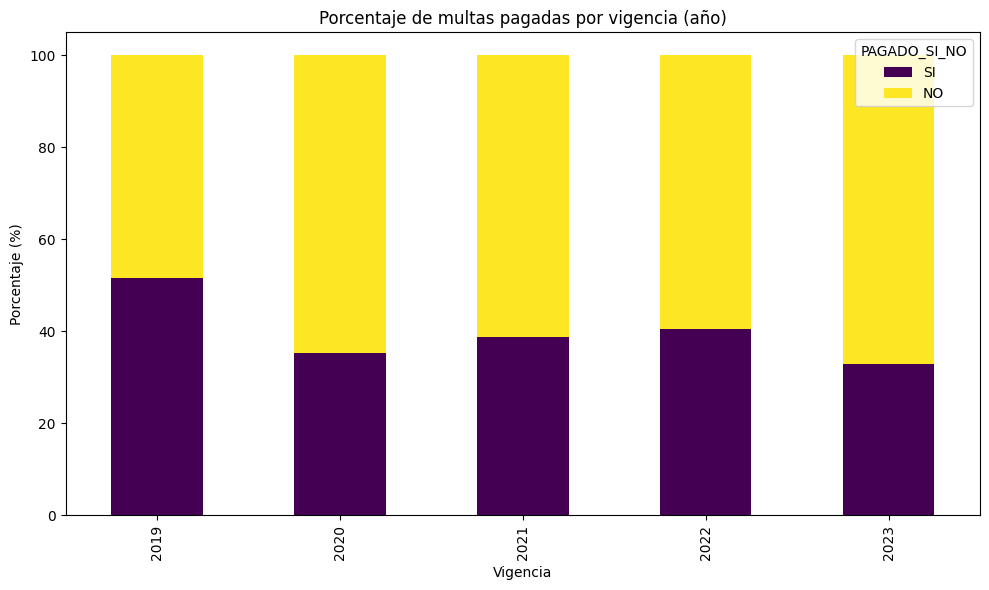

In [13]:
#Visualizando el porcentaje de pago de multas
multas_porcentaje[["SI", "NO"]].plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Porcentaje de multas pagadas por vigencia (año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()

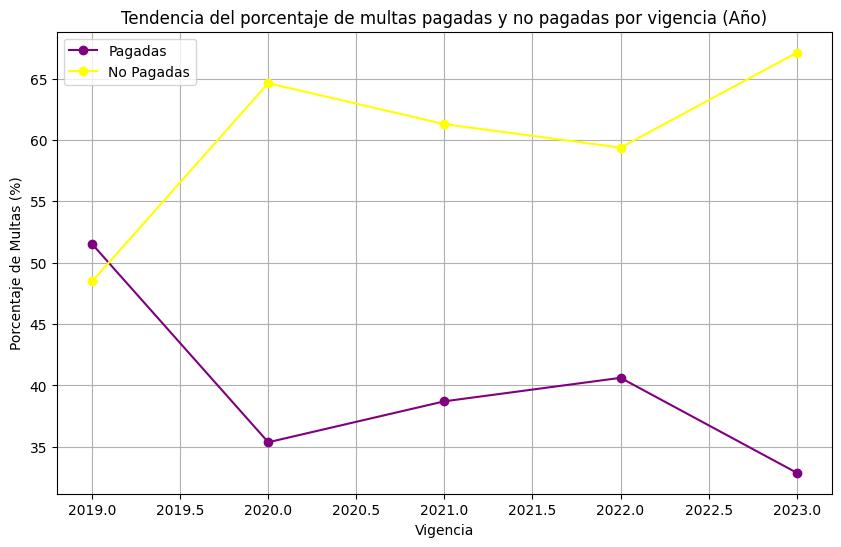

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje.index, multas_porcentaje["SI"], marker='o', color='purple', label='Pagadas')
plt.plot(multas_porcentaje.index, multas_porcentaje["NO"], marker='o', color='yellow', label='No Pagadas')
plt.title("Tendencia del porcentaje de multas pagadas y no pagadas por vigencia (Año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje de Multas (%)")
plt.grid(True)
plt.legend()
plt.show()

#7.Ejercicio para la ciudad de Barranquilla

In [15]:
#seleccionado Barranquilla
df_barranquilla=df[df["CIUDAD"]=="Barranquilla"]
print(df_barranquilla.head(20).to_string(index=False))
print()
print(f"La cantidad de registros para Barranquilla es: {df_barranquilla.shape[0]}")

 VIGENCIA  PLACA FECHA_MULTA VALOR_MULTA DEPARTAMENTO       CIUDAD PAGADO_SI_NO
     2020 MXP886  20/10/2020     438,900    Atlantico Barranquilla           SI
     2019 TDV086  01/05/2019     414,060    Atlantico Barranquilla           NO
     2019    SIM  26/03/2019           0    Atlantico Barranquilla           NO
     2019 AOL08D  26/03/2019     138,020    Atlantico Barranquilla           NO
     2019 LLG659  26/03/2019     828,120    Atlantico Barranquilla           SI
     2019 QHD12C  26/03/2019     138,020    Atlantico Barranquilla           NO
     2019 SQY57A  26/03/2019     220,832    Atlantico Barranquilla           NO
     2019 JHH45E  23/09/2019     220,832    Atlantico Barranquilla           NO
     2019 FKA69B  26/03/2019     138,020    Atlantico Barranquilla           NO
     2019 DAJ79B  26/03/2019     414,060    Atlantico Barranquilla           NO
     2019 UYZ197  26/03/2019     220,832    Atlantico Barranquilla           NO
     2021 DNK791  29/11/2021     447,555

In [16]:
#Obtener los datos únicos de las vigencias
print(df_barranquilla["VIGENCIA"].unique())

[2020 2019 2021 2022 2023]


In [17]:
#Verificar si se tienen datos nulos
print(df_barranquilla.isnull().sum())

VIGENCIA        0
PLACA           0
FECHA_MULTA     0
VALOR_MULTA     0
DEPARTAMENTO    0
CIUDAD          0
PAGADO_SI_NO    0
dtype: int64


In [18]:
#Borrar la coma del valor de la multa
df_barranquilla["VALOR_MULTA"]=df_barranquilla["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)
df_barranquilla["VALOR_MULTA"]=pd.to_numeric(df_barranquilla["VALOR_MULTA"], errors='coerce')
print()
print("----"*10)
print(df_barranquilla.info())

/tmp/ipython-input-3796529631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barranquilla["VALOR_MULTA"]=df_barranquilla["VALOR_MULTA"].astype(str).str.replace(',','',regex=False)



----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 910187 entries, 95 to 19958088
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   VIGENCIA      910187 non-null  int64 
 1   PLACA         910187 non-null  object
 2   FECHA_MULTA   910187 non-null  object
 3   VALOR_MULTA   910187 non-null  int64 
 4   DEPARTAMENTO  910187 non-null  object
 5   CIUDAD        910187 non-null  object
 6   PAGADO_SI_NO  910187 non-null  object
dtypes: int64(2), object(5)
memory usage: 55.6+ MB
None


/tmp/ipython-input-3796529631.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barranquilla["VALOR_MULTA"]=pd.to_numeric(df_barranquilla["VALOR_MULTA"], errors='coerce')


In [19]:
# Convirtiendo el pago de la multa en 0/1
df_barranquilla["PAGADO_SI_NO_NUM"] = df_barranquilla["PAGADO_SI_NO"].apply(lambda x: 1 if x == "SI" else 0)

print(df_barranquilla.info())

/tmp/ipython-input-1612115208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barranquilla["PAGADO_SI_NO_NUM"] = df_barranquilla["PAGADO_SI_NO"].apply(lambda x: 1 if x == "SI" else 0)


<class 'pandas.core.frame.DataFrame'>
Index: 910187 entries, 95 to 19958088
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VIGENCIA          910187 non-null  int64 
 1   PLACA             910187 non-null  object
 2   FECHA_MULTA       910187 non-null  object
 3   VALOR_MULTA       910187 non-null  int64 
 4   DEPARTAMENTO      910187 non-null  object
 5   CIUDAD            910187 non-null  object
 6   PAGADO_SI_NO      910187 non-null  object
 7   PAGADO_SI_NO_NUM  910187 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 62.5+ MB
None


In [20]:
# Convirtiendo la fecha de la multa en formato fecha
df_barranquilla["FECHA_MULTA"] = pd.to_datetime(df_barranquilla["FECHA_MULTA"], format="%d/%m/%Y", errors="coerce")

print(df_barranquilla.info())

/tmp/ipython-input-1042120640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barranquilla["FECHA_MULTA"] = pd.to_datetime(df_barranquilla["FECHA_MULTA"], format="%d/%m/%Y", errors="coerce")


<class 'pandas.core.frame.DataFrame'>
Index: 910187 entries, 95 to 19958088
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   VIGENCIA          910187 non-null  int64         
 1   PLACA             910187 non-null  object        
 2   FECHA_MULTA       910187 non-null  datetime64[ns]
 3   VALOR_MULTA       910187 non-null  int64         
 4   DEPARTAMENTO      910187 non-null  object        
 5   CIUDAD            910187 non-null  object        
 6   PAGADO_SI_NO      910187 non-null  object        
 7   PAGADO_SI_NO_NUM  910187 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.5+ MB
None


In [21]:
print(df_barranquilla.head(20).to_string(index=False))

 VIGENCIA  PLACA FECHA_MULTA  VALOR_MULTA DEPARTAMENTO       CIUDAD PAGADO_SI_NO  PAGADO_SI_NO_NUM
     2020 MXP886  2020-10-20       438900    Atlantico Barranquilla           SI                 1
     2019 TDV086  2019-05-01       414060    Atlantico Barranquilla           NO                 0
     2019    SIM  2019-03-26            0    Atlantico Barranquilla           NO                 0
     2019 AOL08D  2019-03-26       138020    Atlantico Barranquilla           NO                 0
     2019 LLG659  2019-03-26       828120    Atlantico Barranquilla           SI                 1
     2019 QHD12C  2019-03-26       138020    Atlantico Barranquilla           NO                 0
     2019 SQY57A  2019-03-26       220832    Atlantico Barranquilla           NO                 0
     2019 JHH45E  2019-09-23       220832    Atlantico Barranquilla           NO                 0
     2019 FKA69B  2019-03-26       138020    Atlantico Barranquilla           NO                 0
     2019 

In [22]:
#Estadisticas descriptivas con VALOR_MULTA
with pd.option_context("display.float_format", "{:f}".format):
    print(df_barranquilla["VALOR_MULTA"].describe())
print()
#Calcular el promedio de las multas por vigencia (año)
multas_promedio_por_vigencia_barranquilla=df_barranquilla.groupby("VIGENCIA")["VALOR_MULTA"].describe()
print(multas_promedio_por_vigencia_barranquilla)

count      910187.000000
mean       546058.893873
std       1820928.300993
min             0.000000
25%        414060.000000
50%        447555.000000
75%        522795.000000
max     100373936.000000
Name: VALOR_MULTA, dtype: float64

             count           mean           std  min       25%       50%  \
VIGENCIA                                                                   
2019      260710.0  453598.592735  1.348056e+06  0.0  220832.0  414060.0   
2020      156940.0  486241.762712  1.235043e+06  0.0  292600.0  438900.0   
2021      157834.0  537916.492689  1.913174e+06  0.0  238696.0  447555.0   
2022      188624.0  599535.524021  2.040832e+06  0.0  468450.0  468450.0   
2023      146079.0  715085.225775  2.528584e+06  0.0  522795.0  522795.0   

               75%          max  
VIGENCIA                         
2019      414060.0   79499520.0  
2020      438900.0   84268800.0  
2021      447555.0   85930560.0  
2022      468589.0   89941787.0  
2023      522940.0  10037393

In [23]:
#Tabla para ver el porcentaje de multas pagadas
multas_counts_barranquilla=df_barranquilla.groupby(["VIGENCIA", "PAGADO_SI_NO"]).size().unstack(fill_value=0)
multas_counts_barranquilla["TOTAL"]=multas_counts_barranquilla.sum(axis=1)
print(multas_counts_barranquilla)
print("---"*3)

multas_porcentaje_barranquilla=multas_counts_barranquilla.div(multas_counts_barranquilla["TOTAL"], axis=0)*100
print("---"*3)
print("Porcenta de multas pagadas por vigencia (año)")
print("")
print(multas_porcentaje_barranquilla)

PAGADO_SI_NO      NO      SI   TOTAL
VIGENCIA                            
2019          149444  111266  260710
2020           86658   70282  156940
2021           89796   68038  157834
2022          113280   75344  188624
2023           92013   54066  146079
---------
---------
Porcenta de multas pagadas por vigencia (año)

PAGADO_SI_NO         NO         SI  TOTAL
VIGENCIA                                 
2019          57.321929  42.678071  100.0
2020          55.217280  44.782720  100.0
2021          56.892685  43.107315  100.0
2022          60.055984  39.944016  100.0
2023          62.988520  37.011480  100.0


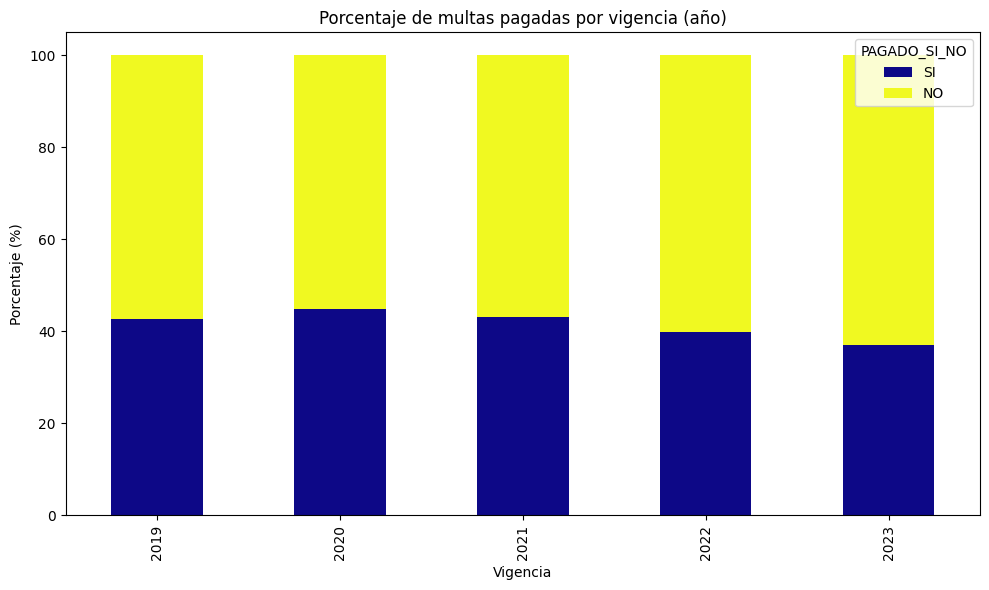

In [24]:
#Visualizando el porcentaje de pago de multas
multas_porcentaje_barranquilla[["SI", "NO"]].plot(kind="bar", stacked=True, figsize=(10,6), colormap="plasma")
plt.title("Porcentaje de multas pagadas por vigencia (año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje (%)")
plt.tight_layout()
plt.show()

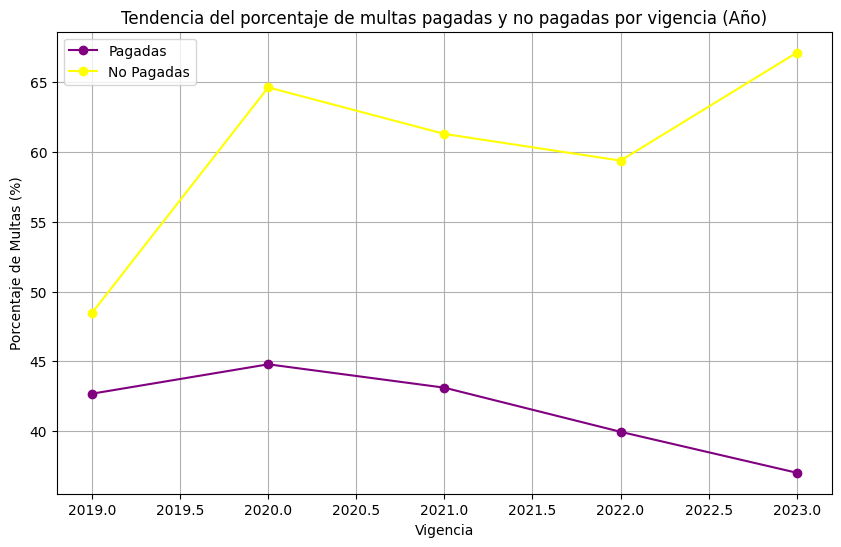

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(multas_porcentaje_barranquilla.index, multas_porcentaje_barranquilla["SI"], marker='o', color='purple', label='Pagadas')
plt.plot(multas_porcentaje_barranquilla.index, multas_porcentaje["NO"], marker='o', color='yellow', label='No Pagadas')
plt.title("Tendencia del porcentaje de multas pagadas y no pagadas por vigencia (Año)")
plt.xlabel("Vigencia")
plt.ylabel("Porcentaje de Multas (%)")
plt.grid(True)
plt.legend()
plt.show()

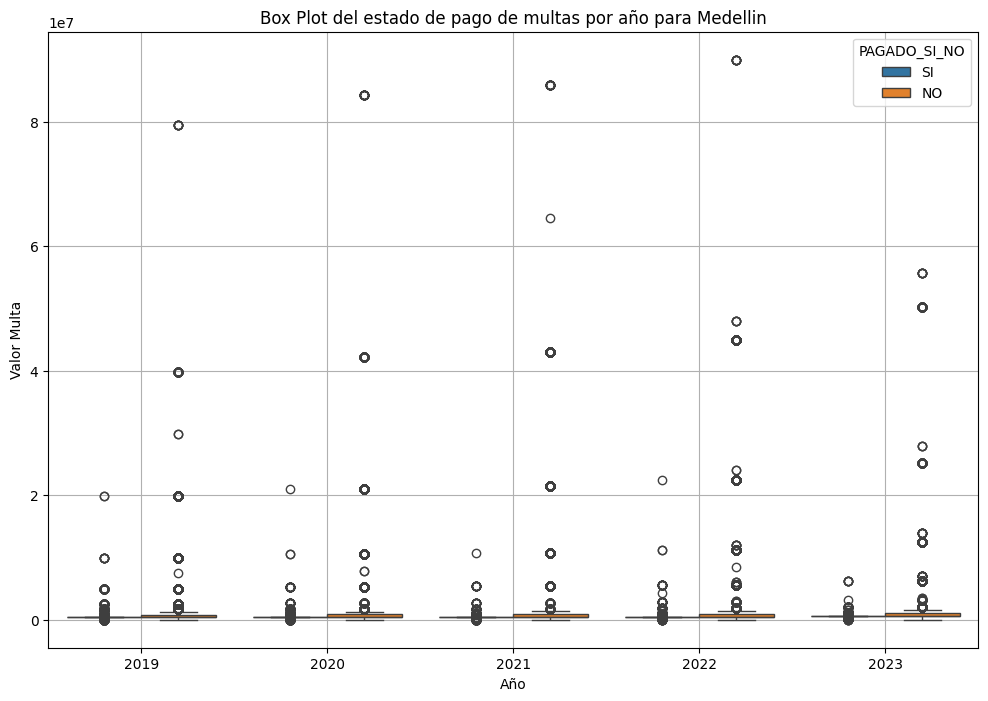

In [26]:
# Generando  Box Plot para Medellín
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_medellin, x="VIGENCIA", y="VALOR_MULTA", hue="PAGADO_SI_NO")
plt.title("Box Plot del estado de pago de multas por año para Medellin")
plt.xlabel("Año")
plt.ylabel("Valor Multa")
plt.grid(True)
plt.show()